In [32]:
import numpy as np
import matplotlib.pyplot as plt
from poles_roots.aaa import AAA
from poles_roots._utils import linspace_on_tri, convert_cart_to_complex
from tqdm import tqdm

For now we only consider right triangle of different sizes.

In [33]:
side_length = 3

points = np.array([[0,0], [side_length, 0], [0, side_length]])

def linspace_in_right_triangle(num, side_length):
    tmp = np.linspace(0, side_length, num=int(num**0.5))
    [xx, yy] = np.meshgrid(tmp, tmp)
    mask = xx + yy > side_length
    xx = xx[~mask]
    yy = yy[~mask]
    return xx.ravel(), yy.ravel()

# First for a meromorphic function

In [46]:
rng = np.random.default_rng(123456)
in_iterations = []
on_iterations = []
in_pole_error = []
on_pole_error = []
in_approximation_error = []
on_approximation_error = []


for _ in tqdm(range(1000)):
    # generate random pole
    re_pole = rng.uniform(0, side_length)
    im_pole = rng.uniform(0, side_length)
    if re_pole + im_pole > side_length:
        re_pole = side_length - re_pole
        im_pole = side_length - im_pole
    # of random order
    order = rng.integers(1, 15)
    
    pole = re_pole+im_pole*1j
    def f(z):
        return 1/(z-(pole))**order
    
    x, y = linspace_in_right_triangle(1000, side_length)
    Z_in = x+y*1j
    F_in = f(Z_in)
    
    n_actual = x.size
    
    Z = convert_cart_to_complex(linspace_on_tri(points, n_actual))
    F = f(Z)
    
    res_in = AAA(F_in, Z_in)
    res = AAA(F, Z)
    
    on_iterations.append(res.weights.size)
    in_iterations.append(res_in.weights.size)
    in_pole_error.append(np.min(np.abs(res_in.poles - pole)))
    on_pole_error.append(np.min(np.abs(res.poles - pole)))
    
    # generate random points to sample the approximation at
    re_sample = rng.uniform(0, side_length, size=10)
    im_sample = rng.uniform(0, side_length, size=10)
    mask = re_sample + im_sample > side_length
    re_sample[mask] = side_length - re_sample[mask]
    im_sample[mask] = side_length - im_sample[mask]
    sample = re_sample + im_sample*1j
    
    in_approximation_error.append(np.max(np.abs(f(sample) - res_in(sample))))
    on_approximation_error.append(np.max(np.abs(f(sample) - res(sample))))

 19%|█▉        | 189/1000 [00:34<03:02,  4.45it/s]/home/jakeb/development/poles-and-roots/src/poles_roots/aaa.py:197: RuntimeWarning: divide by zero encountered in divide
  N = (1 / (pol[:, np.newaxis] - zj)) @ (fj * wj)
/home/jakeb/development/poles-and-roots/src/poles_roots/aaa.py:198: RuntimeWarning: divide by zero encountered in divide
  Ddiff = -((1 / np.subtract.outer(pol, zj)) ** 2) @ wj
100%|██████████| 1000/1000 [02:53<00:00,  5.75it/s]


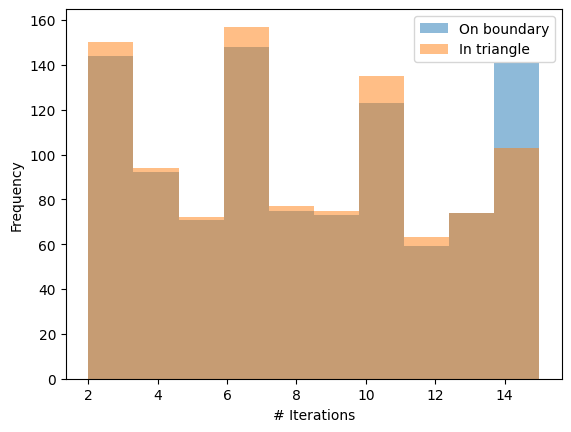

In [47]:
fig, ax = plt.subplots()
ax.hist(on_iterations, alpha=0.5, label="On boundary")
ax.hist(in_iterations, alpha=0.5, label="In triangle")
ax.set_xlabel("# Iterations")
ax.set_ylabel("Frequency")
ax.legend()

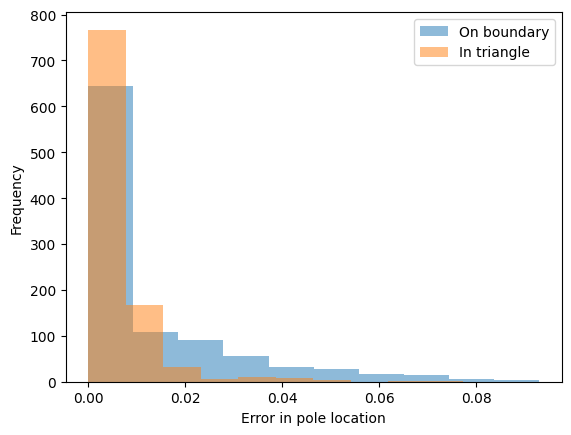

In [48]:
fig, ax = plt.subplots()
ax.hist(on_pole_error, alpha=0.5, label="On boundary")
ax.hist(in_pole_error, alpha=0.5, label="In triangle")
ax.set_xlabel("Error in pole location")
ax.set_ylabel("Frequency")
ax.legend()

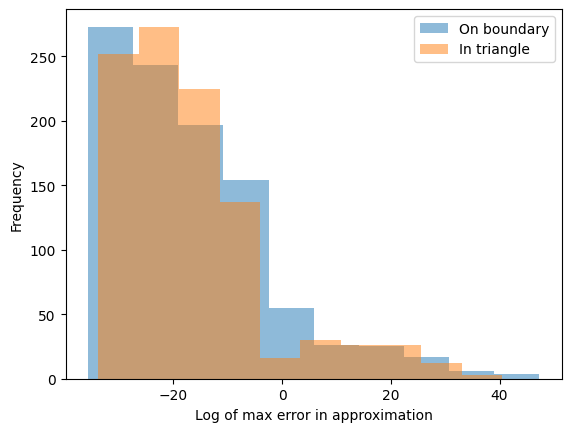

In [49]:
combinded = np.concatenate([on_approximation_error, in_approximation_error])
logbins = np.geomspace(combinded.min(), combinded.max(), 8)

fig, ax = plt.subplots()
ax.hist(np.log(on_approximation_error), alpha=0.5, label="On boundary")
ax.hist(np.log(in_approximation_error), alpha=0.5, label="In triangle")
ax.set_xlabel("Log of max error in approximation")
ax.set_ylabel("Frequency")
ax.legend()

# Then for a Holomorphic function

In [51]:
rng = np.random.default_rng(123456)
in_iterations = []
on_iterations = []
in_pole_error = []
on_pole_error = []
in_approximation_error = []
on_approximation_error = []


for _ in tqdm(range(1000)):
    # generate random pole
    re_pole = rng.uniform(0, side_length)
    im_pole = rng.uniform(0, side_length)
    if re_pole + im_pole > side_length:
        re_pole = side_length - re_pole
        im_pole = side_length - im_pole
    # of random order
    order = rng.integers(1, 15)
    
    pole = re_pole+im_pole*1j
    def f(z):
        return (z-(pole))**order
    
    x, y = linspace_in_right_triangle(1000, side_length)
    Z_in = x+y*1j
    F_in = f(Z_in)
    
    n_actual = x.size
    
    Z = convert_cart_to_complex(linspace_on_tri(points, n_actual))
    F = f(Z)
    
    res_in = AAA(F_in, Z_in)
    res = AAA(F, Z)
    
    on_iterations.append(res.weights.size)
    in_iterations.append(res_in.weights.size)
    in_pole_error.append(np.min(np.abs(res_in.zeros - pole)))
    on_pole_error.append(np.min(np.abs(res.zeros - pole)))
    
    # generate random points to sample the approximation at
    re_sample = rng.uniform(0, side_length, size=10)
    im_sample = rng.uniform(0, side_length, size=10)
    mask = re_sample + im_sample > side_length
    re_sample[mask] = side_length - re_sample[mask]
    im_sample[mask] = side_length - im_sample[mask]
    sample = re_sample + im_sample*1j
    
    in_approximation_error.append(np.max(np.abs(f(sample) - res_in(sample))))
    on_approximation_error.append(np.max(np.abs(f(sample) - res(sample))))

  6%|▌         | 56/1000 [00:08<01:45,  8.93it/s]/home/jakeb/development/poles-and-roots/src/poles_roots/aaa.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  r[np.isinf(zv)] = np.sum(self.weights * self.data_values) / np.sum(self.weights)
100%|██████████| 1000/1000 [03:14<00:00,  5.15it/s]


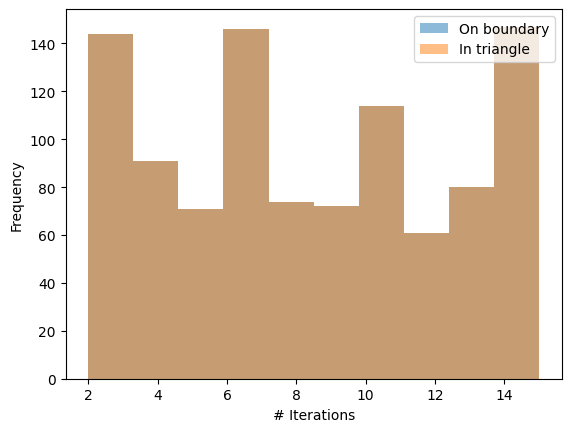

In [52]:
fig, ax = plt.subplots()
ax.hist(on_iterations, alpha=0.5, label="On boundary")
ax.hist(in_iterations, alpha=0.5, label="In triangle")
ax.set_xlabel("# Iterations")
ax.set_ylabel("Frequency")
ax.legend()

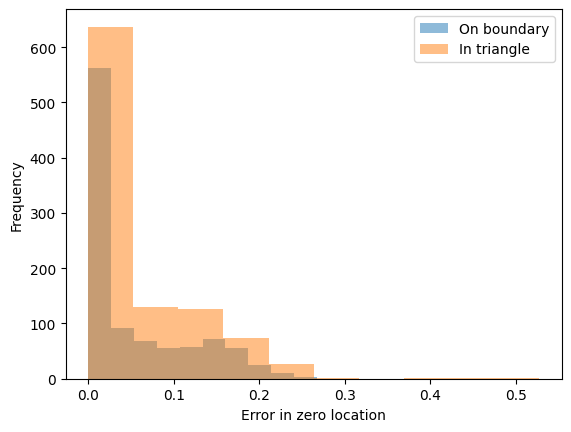

In [54]:
fig, ax = plt.subplots()
ax.hist(on_pole_error, alpha=0.5, label="On boundary")
ax.hist(in_pole_error, alpha=0.5, label="In triangle")
ax.set_xlabel("Error in zero location")
ax.set_ylabel("Frequency")
ax.legend()

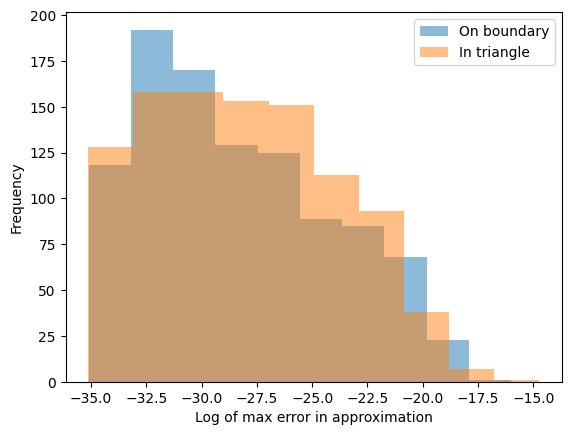

In [55]:
combinded = np.concatenate([on_approximation_error, in_approximation_error])
logbins = np.geomspace(combinded.min(), combinded.max(), 8)

fig, ax = plt.subplots()
ax.hist(np.log(on_approximation_error), alpha=0.5, label="On boundary")
ax.hist(np.log(in_approximation_error), alpha=0.5, label="In triangle")
ax.set_xlabel("Log of max error in approximation")
ax.set_ylabel("Frequency")
ax.legend()